<a href="https://colab.research.google.com/github/JuanRosales707/md-lab01-RC/blob/main/Laboratorio_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

## **Teniendo en cuenta la información del repositorio, la variable Sample_code_number es la única del tipo categórica, las demás son todas numéricas. Ahora debido a que solo se trata de un identificador, se procede a no tomarla en cuenta en el desarrollo del laboratorio.**

In [3]:
# Almacenar en un solo dataframe
import pandas as pd
data = pd.concat([X, y], axis=1)
data.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2



## **Para no tener errores en el modelado, previamente limpiamos la data**

In [4]:
#Información de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [5]:
#Columnas con missings
columnas_nulas=data.columns[data.isnull().any()]
print(columnas_nulas)

Index(['Bare_nuclei'], dtype='object')


In [6]:
#Número de missings por columna
data.isnull().sum()

,0
Clump_thickness,0
Uniformity_of_cell_size,0
Uniformity_of_cell_shape,0
Marginal_adhesion,0
Single_epithelial_cell_size,0
Bare_nuclei,16
Bland_chromatin,0
Normal_nucleoli,0
Mitoses,0
Class,0


In [7]:
data['Bare_nuclei'] = pd.to_numeric(data['Bare_nuclei'], errors='coerce')
data['Bare_nuclei'].fillna(data['Bare_nuclei'].median(), inplace=True)

<ipython-input-7-e21e6f2b551c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bare_nuclei'].fillna(data['Bare_nuclei'].median(), inplace=True)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  699 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [9]:
#Limpieza de outliers por detección mediante rango intercuartílico
import numpy as np
def eliminar_outliers_iqr(df, k=3):
    df_limpio = df.copy()
    columnas_numericas = df.select_dtypes(include=[np.number]).columns
    for col in columnas_numericas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - k * IQR
        lim_sup = Q3 + k * IQR
        df_limpio = df_limpio[(df_limpio[col] >= lim_inf) & (df_limpio[col] <= lim_sup)]
    return df_limpio

data = eliminar_outliers_iqr(data, k=3)
data.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [10]:
#Limpieza de outliers por distancia de mahalanobis
from scipy.spatial.distance import mahalanobis
def calc_mahalanobis(df):
    columnas_excluir = ['Sample_code_number', 'Class']
    columnas_numericas = df.select_dtypes(include=[np.number]).columns
    columnas_uso = [col for col in columnas_numericas if col not in columnas_excluir]

    X = df[columnas_uso]
    cov_matrix = np.cov(X, rowvar=False)

    # Usar pseudoinversa en lugar de inversa para evitar problemas con matrices singulares
    inv_cov_matrix = np.linalg.pinv(cov_matrix)

    mean_datos = X.mean(axis=0).values
    distancias = X.apply(lambda row: mahalanobis(row.values, mean_datos, inv_cov_matrix), axis=1)
    return distancias

In [11]:
dist_mahalanobis = calc_mahalanobis(data)
data = data[dist_mahalanobis < 30]
data.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [12]:
X = data.drop('Class', axis=1)
y = data['Class']

In [13]:
#Evitamos futuros problemas reduciendo la dimensionalidad
from sklearn.decomposition import PCA

In [14]:
#Evitamos futuros problemas reduciendo la dimensionalidad
from sklearn.decomposition import PCA

pca = PCA(n_components='mle', svd_solver='full')
data_pca = pca.fit_transform(data)

from scipy.stats import gaussian_kde
kde = gaussian_kde(data_pca.T)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              579 non-null    int64  
 1   Uniformity_of_cell_size      579 non-null    int64  
 2   Uniformity_of_cell_shape     579 non-null    int64  
 3   Marginal_adhesion            579 non-null    int64  
 4   Single_epithelial_cell_size  579 non-null    int64  
 5   Bare_nuclei                  579 non-null    float64
 6   Bland_chromatin              579 non-null    int64  
 7   Normal_nucleoli              579 non-null    int64  
 8   Mitoses                      579 non-null    int64  
 9   Class                        579 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 49.8 KB


## **a. Por medio de la librería ‘Pandas’, lea la base de datos, separe las variables numéricas de las no numéricas tomando en cuenta la información que se encuentra en el repositorio, calcule sus estadísticos descriptivos y halle la matriz de correlación.**

In [16]:
print(data.shape)
data.dtypes

(579, 10)


,0
Clump_thickness,int64
Uniformity_of_cell_size,int64
Uniformity_of_cell_shape,int64
Marginal_adhesion,int64
Single_epithelial_cell_size,int64
Bare_nuclei,float64
Bland_chromatin,int64
Normal_nucleoli,int64
Mitoses,int64
Class,int64


In [17]:
#Cálculo de los estadísticos descriptivos
from pandas import set_option
set_option('display.width', 100)
set_option('display.precision', 2)
print(data.describe())

       Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  Marginal_adhesion  \
count           579.00                   579.00                    579.00             579.00   
mean              3.85                     2.45                      2.58               2.22   
std               2.53                     2.59                      2.55               2.32   
min               1.00                     1.00                      1.00               1.00   
25%               2.00                     1.00                      1.00               1.00   
50%               3.00                     1.00                      1.00               1.00   
75%               5.00                     3.00                      3.00               3.00   
max              10.00                    10.00                     10.00              10.00   

       Single_epithelial_cell_size  Bare_nuclei  Bland_chromatin  Normal_nucleoli  Mitoses   Class  
count                       579.00

In [18]:
#Determinación de la matriz de correlación
correlaciones = data.corr(method='pearson')
print(correlaciones,'\n')

                             Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
Clump_thickness                         1.00                     0.64                      0.64   
Uniformity_of_cell_size                 0.64                     1.00                      0.91   
Uniformity_of_cell_shape                0.64                     0.91                      1.00   
Marginal_adhesion                       0.46                     0.69                      0.67   
Single_epithelial_cell_size             0.51                     0.70                      0.68   
Bare_nuclei                             0.55                     0.69                      0.70   
Bland_chromatin                         0.54                     0.75                      0.74   
Normal_nucleoli                         0.48                     0.69                      0.68   
Mitoses                                  NaN                      NaN                       NaN   
Class     

## **b. Por medio de la librería ‘Matplotlib’, elabore histogramas, gráficos de densidad, box plot y diagramas de dispersión incluyendo diversos parámetros para estos.**

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

# Variables numéricas (excluyendo la columna 'Class')
features = data.drop(columns='Class').columns


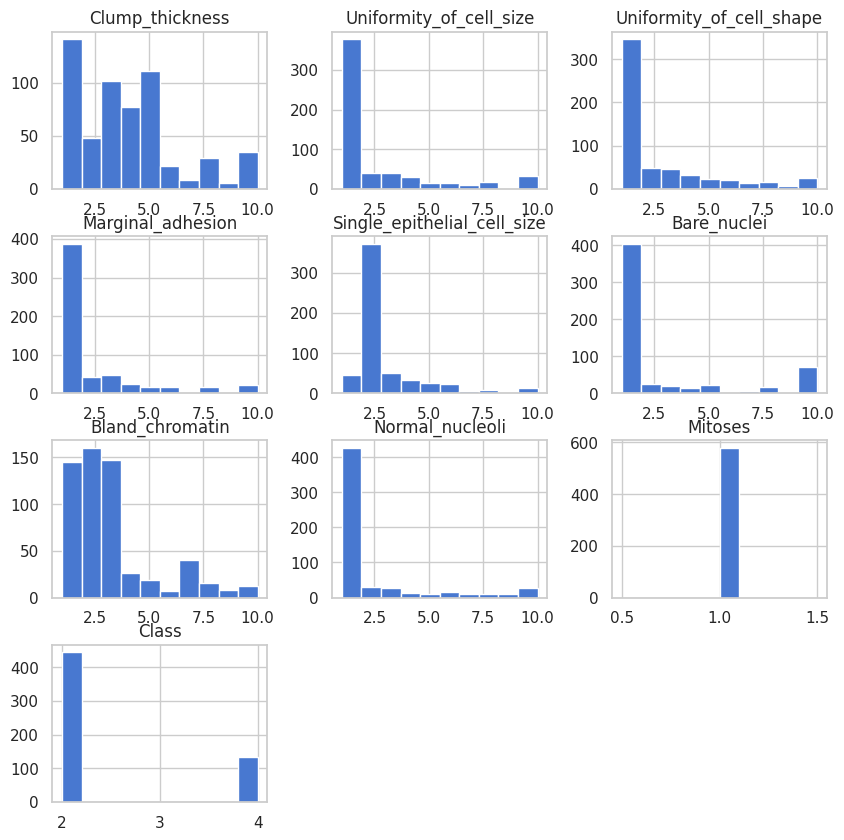

In [23]:
#Gráficos de histogramas
import matplotlib.pyplot as plt
data.hist(figsize=(10,10))
plt.show()

<ipython-input-25-e60eb12a8045>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='red')


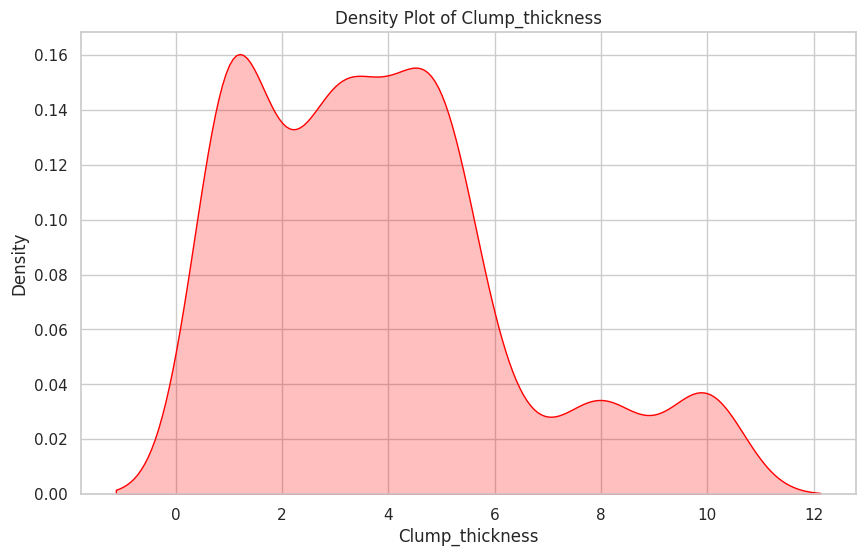

<ipython-input-25-e60eb12a8045>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='red')


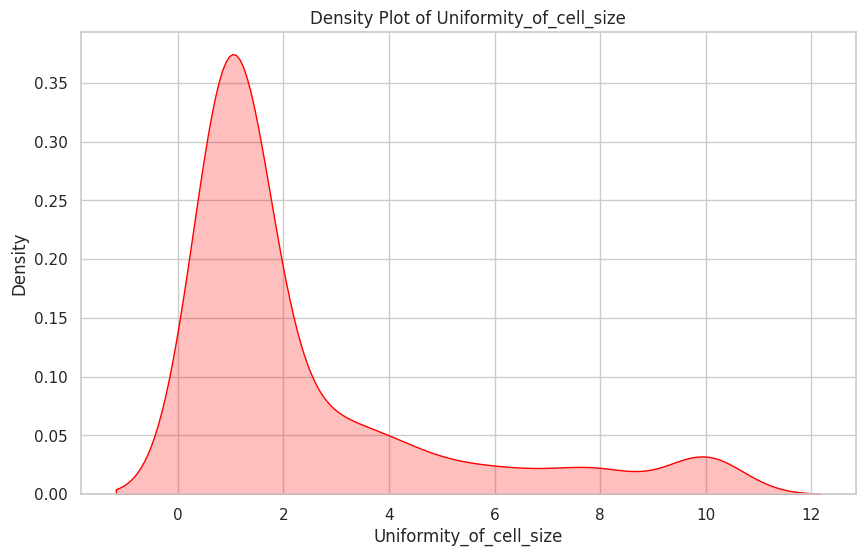

<ipython-input-25-e60eb12a8045>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='red')


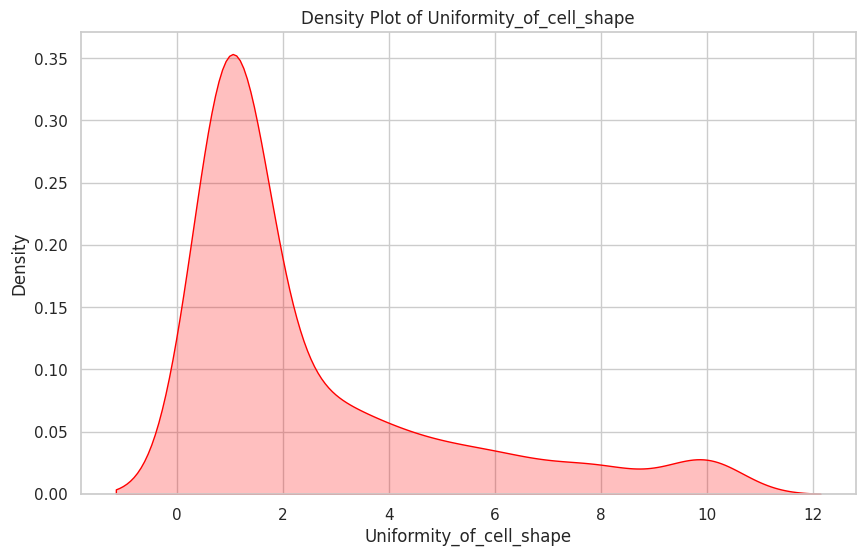

<ipython-input-25-e60eb12a8045>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='red')


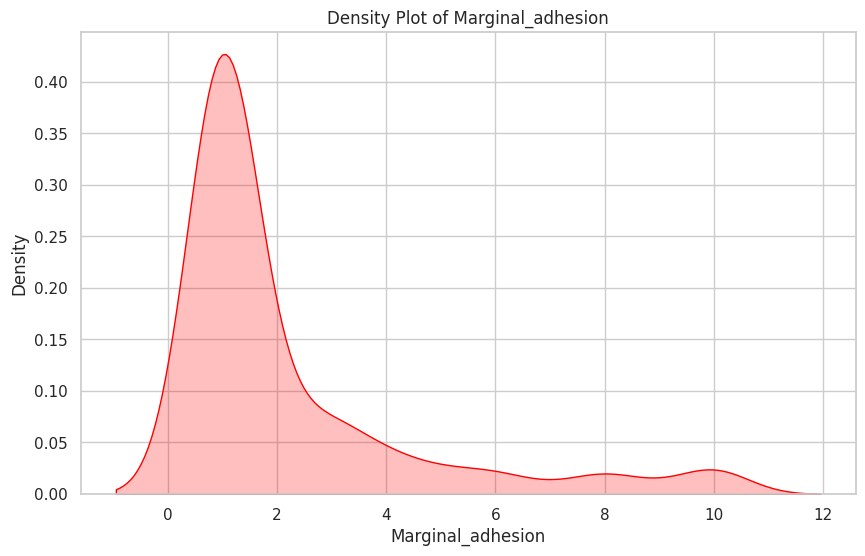

<ipython-input-25-e60eb12a8045>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='red')


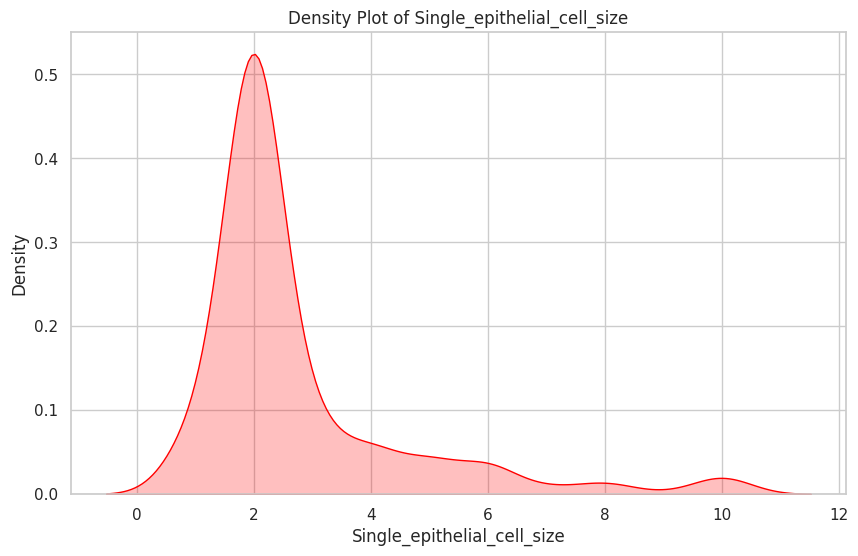

<ipython-input-25-e60eb12a8045>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='red')


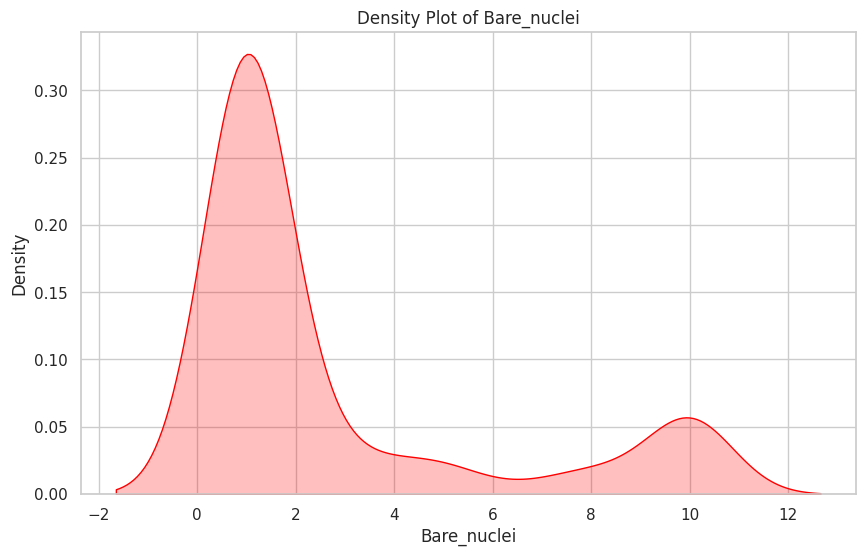

<ipython-input-25-e60eb12a8045>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='red')


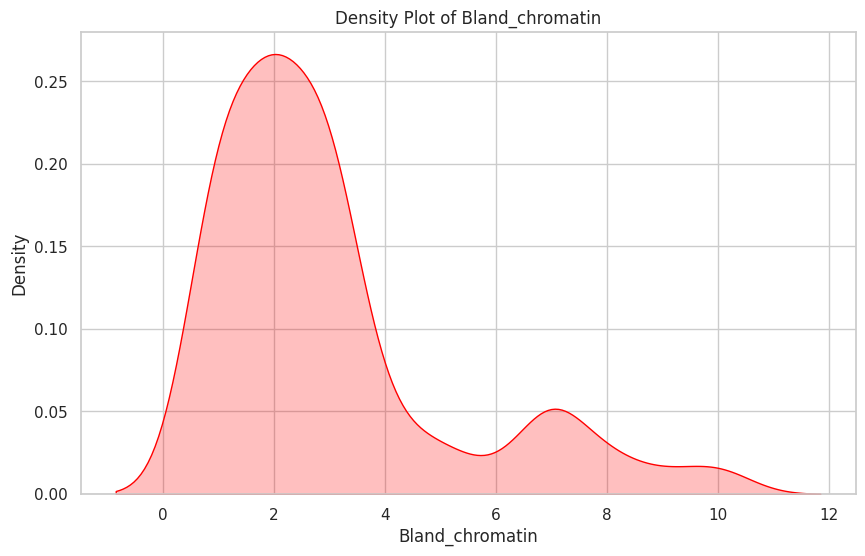

<ipython-input-25-e60eb12a8045>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='red')


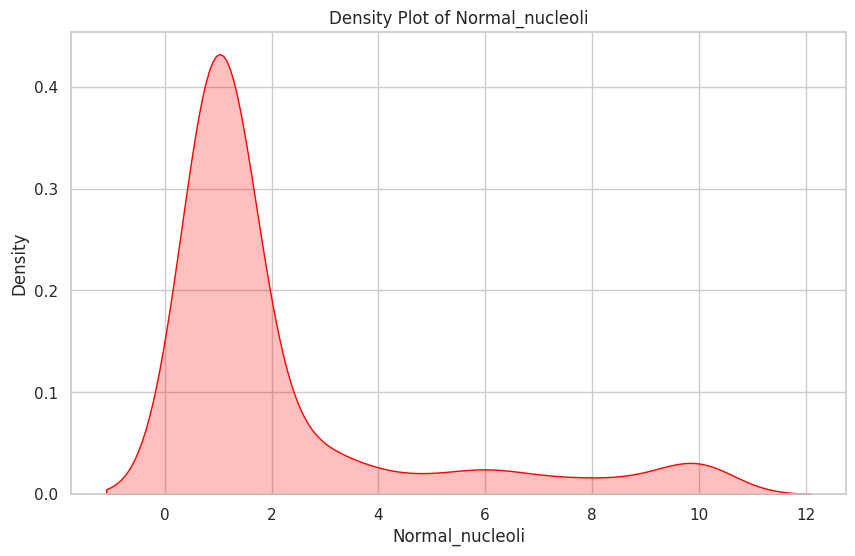

<ipython-input-25-e60eb12a8045>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color='red')
<ipython-input-25-e60eb12a8045>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], shade=True, color='red')


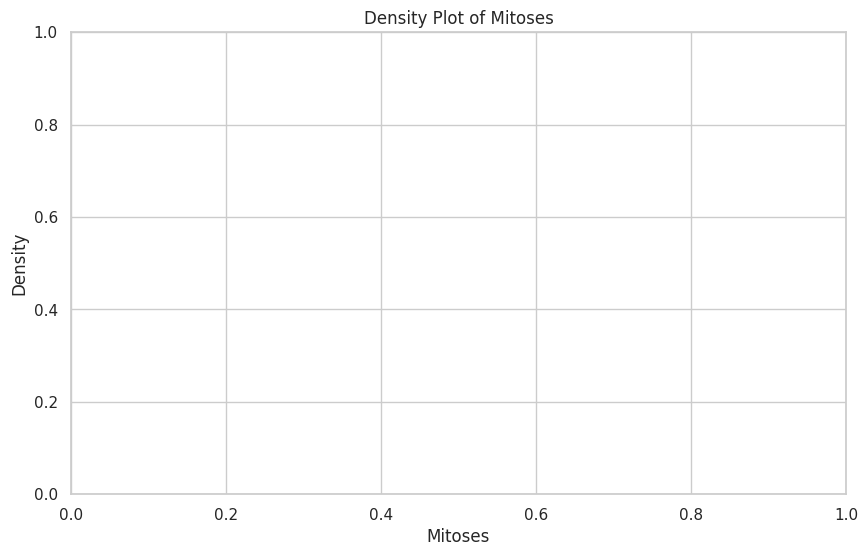

In [25]:
for col in features:
    sns.kdeplot(data[col], shade=True, color='red')
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()



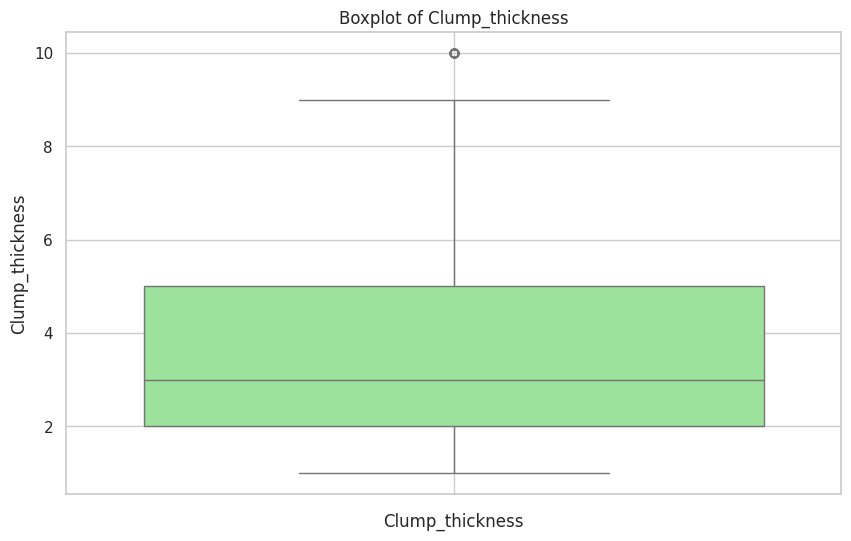

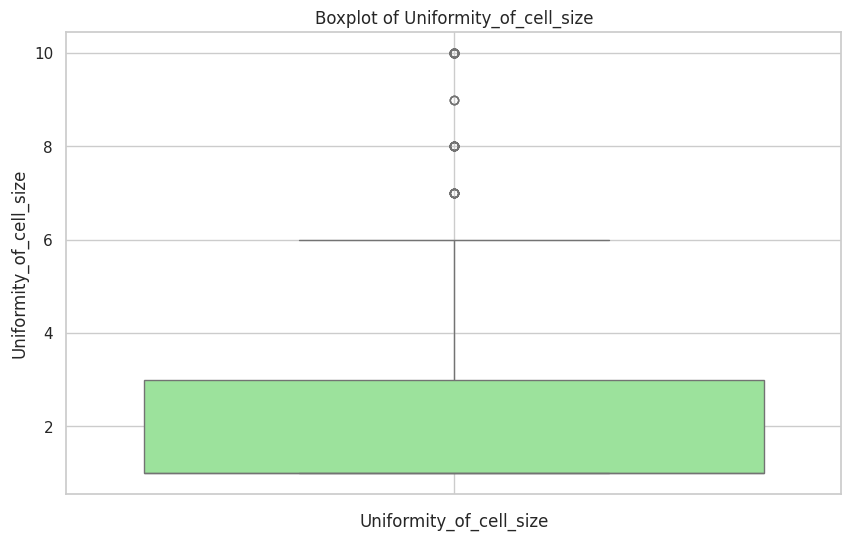

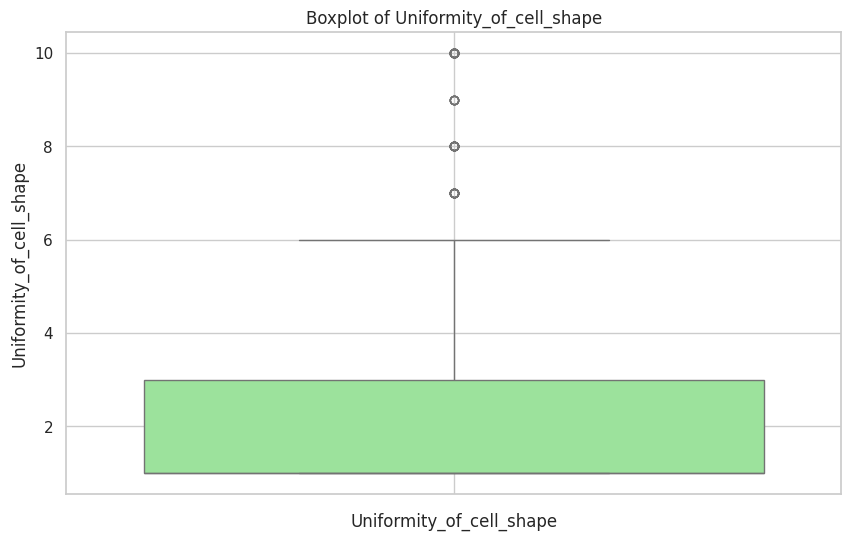

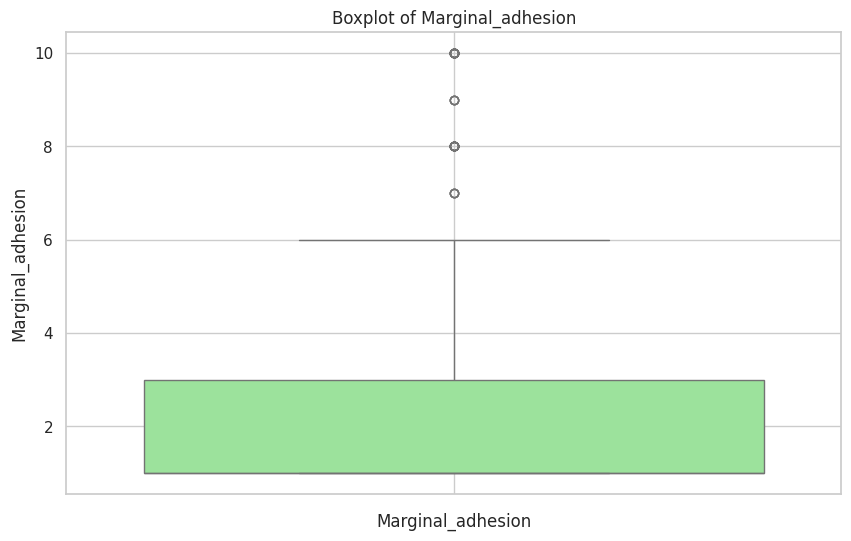

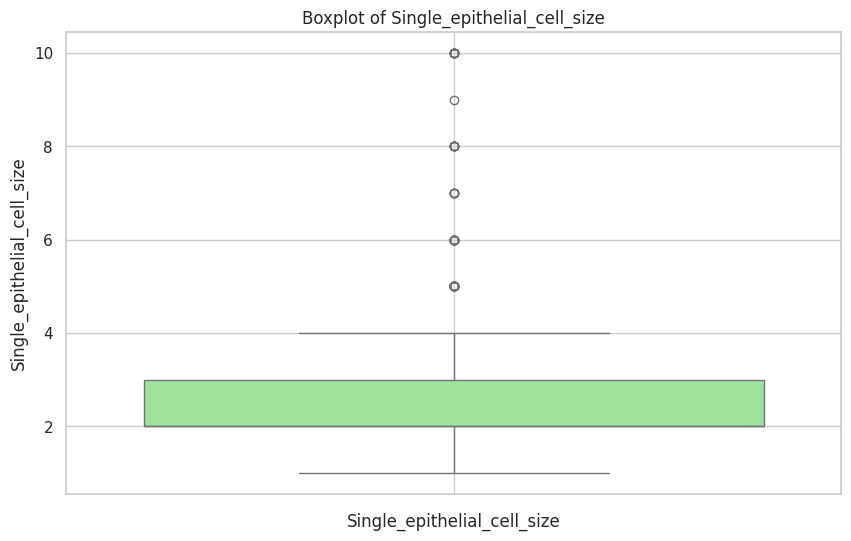

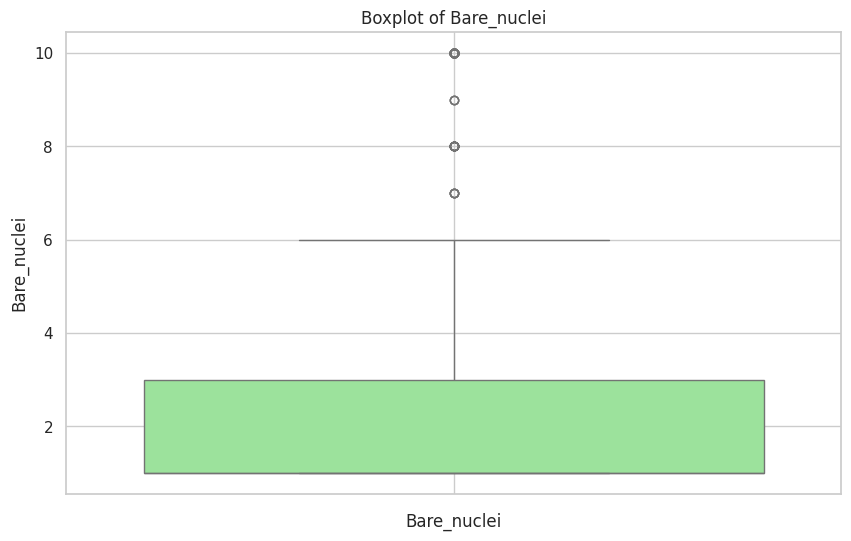

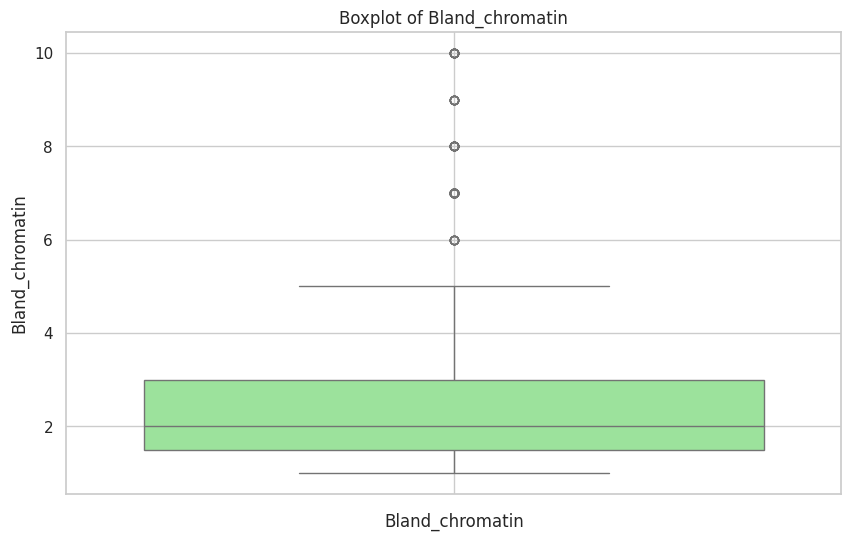

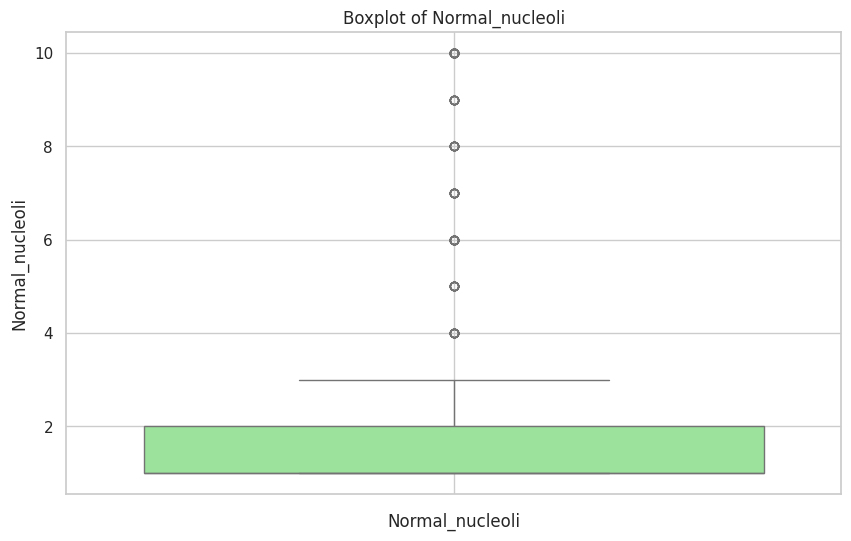

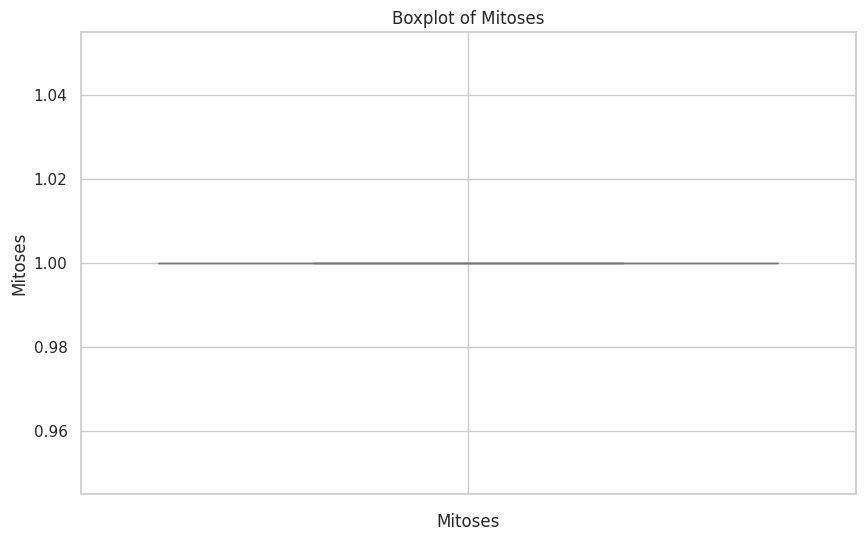

In [26]:
for col in features:
    sns.boxplot(data=data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


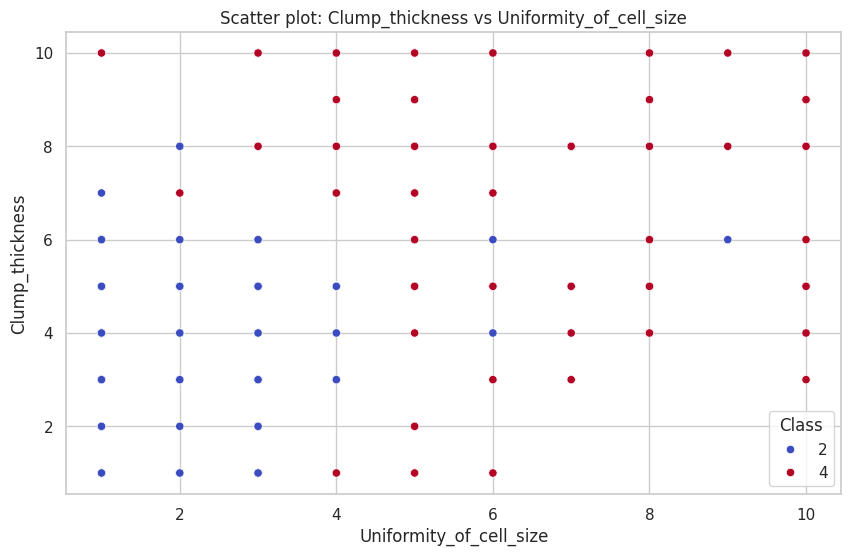

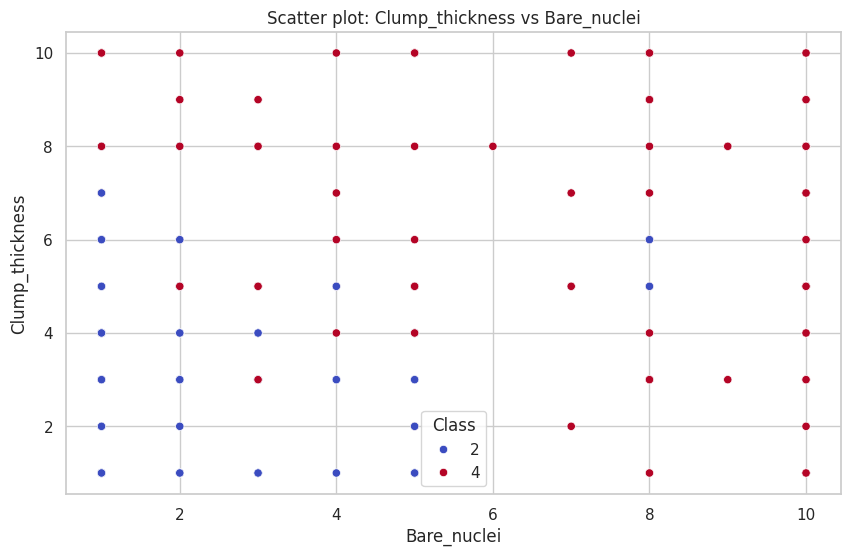

In [31]:
for var in variables:
    if var != 'Clump_thickness':
        sns.scatterplot(x=data[var], y=data['Clump_thickness'], hue=data['Class'], palette='coolwarm')
        plt.title(f'Scatter plot: Clump_thickness vs {var}')
        plt.xlabel(var)
        plt.ylabel('Clump_thickness')
        plt.grid(True)
        plt.show()

## **c. Utilice la librería ‘Scikit-learn’ para separar la información en datos de entrenamiento y prueba. Además, implemente un modelo k-NN con dicha información, realice pronósticos y mida la precisión para los datos de entrenamiento y prueba**

In [32]:
# 1. Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [33]:
data['Bare_nuclei'] = pd.to_numeric(data['Bare_nuclei'], errors='coerce')
data = data.dropna()

In [35]:
# Separar las variables predictoras (X) y la variable objetivo (y)
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9704
Test Accuracy: 0.9828


In [41]:
# Reporte de clasificación
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Data):
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       139
           4       0.97      0.94      0.96        35

    accuracy                           0.98       174
   macro avg       0.98      0.97      0.97       174
weighted avg       0.98      0.98      0.98       174

